In [3]:
%run Ising_Model_Hamiltonian_Function.ipynb

In [4]:
def mutual_info(length, psi, A, B):
#length = length of spin chain
#psi = groundstate vector from respective model
#A = A spin
#B = B spin
    
#create a selection of "everything else" based on given A and B
    C = [item for i, item in enumerate(range(length)) if i not in A and i not in B]
    
#create reduced density matrices for each partition
    rhoA = Q.ptrace(psi,A)
    rhoB = Q.ptrace(psi,B)
    rhoC = Q.ptrace(psi,C)
    
#compute eigenvalues and entropy for A
    eigenvalsA = rhoA.eigenenergies()
    threshold1 = abs(eigenvalsA) < 10**(-8)
    eigenvalsA[threshold1] = 0
    #print(eigenvals)
    eigenvalscleanedA = [num for num in eigenvalsA if num != 0]
    #print(eigenvalscleaned)
    vnentropylistA = []
    for l in eigenvalscleanedA:
        vnentropylistA.append(-l*np.log(l))
        #print(vnentropylist)
        vnentropyA = sum(vnentropylistA)
    #print(vnentropyA)
    
#compute eigenvalues and entropy for B
    eigenvalsB = rhoB.eigenenergies()
    threshold1 = abs(eigenvalsB) < 10**(-8)
    eigenvalsB[threshold1] = 0
    #print(eigenvals)
    eigenvalscleanedB = [num for num in eigenvalsB if num != 0]
    #print(eigenvalscleaned)
    vnentropylistB = []
    for l in eigenvalscleanedB:
        vnentropylistB.append(-l*np.log(l))
        #print(vnentropylist)
        vnentropyB = sum(vnentropylistB)
    #print(vnentropyB)
    
#compute eigenvalues and entropy for C
    eigenvalsC = rhoC.eigenenergies()
    threshold1 = abs(eigenvalsC) < 10**(-8)
    eigenvalsC[threshold1] = 0
    #print(eigenvals)
    eigenvalscleanedC = [num for num in eigenvalsC if num != 0]
    #print(eigenvalscleaned)
    vnentropylistC = []
    for l in eigenvalscleanedC:
        vnentropylistC.append(-l*np.log(l))
        #print(vnentropylist)
        vnentropyC = sum(vnentropylistC)
    #print(vnentropyC)
    
#compute the mutual information based on the previously computed entropy
    mutualinfo = vnentropyA + vnentropyB - vnentropyC
#compute distance proxy from mutual information
    distance = (-np.log(mutualinfo))/(2*np.log(2))
    return mutualinfo, distance

In [5]:
def graph_pdistance_vs_mutualinfo(length, psi):
    combinations = []
    physdist = []
    mutualinfo = []
    distancelist = []
    # Generate all possible pairs of positions
    for i in range(length):
        for j in range(i + 1, length):
            combinations.append([i, j])
            physdist.append(j-i)
            minfo, distance = mutual_info(length, psi, [i], [j])
            mutualinfo.append(minfo)
            distancelist.append(distance)
            #print(i,j)
    #print(combinations)
    #print(physdist)
    #print(mutualinfo)
    fig, ax = plt.subplots(figsize=(8,8))
    p1 = plt.plot(physdist, mutualinfo, 'ob')
    # label the axes
    ax.set_xlabel("Physical Distance")
    ax.set_ylabel("Mutual Information")

    # set the tick mark parameters
    ax.minorticks_on()
    ax.tick_params(which='both',direction="in",width=1)
    ax.tick_params(which='major',length=7)
    ax.tick_params(which='minor',length=3.5)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(8,8))
    p2 = plt.plot(physdist, distancelist, 'ob')
    # label the axes
    ax.set_xlabel("Physical Distance")
    ax.set_ylabel("Mutual Info Distance")

    # set the tick mark parameters
    ax.minorticks_on()
    ax.tick_params(which='both',direction="in",width=1)
    ax.tick_params(which='major',length=7)
    ax.tick_params(which='minor',length=3.5)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.show()

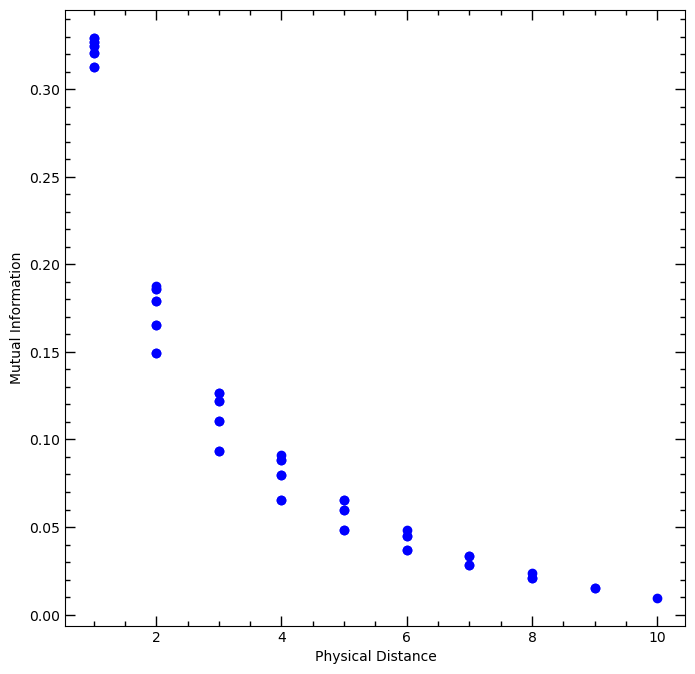

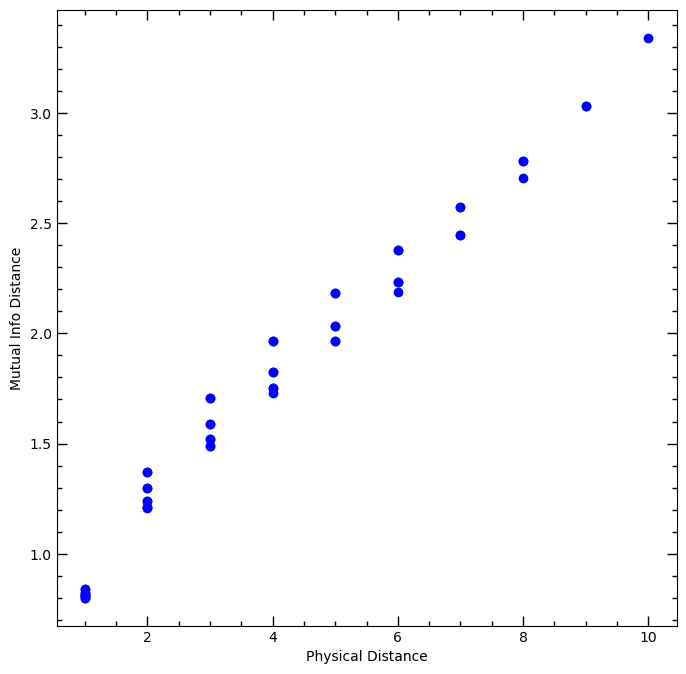

In [6]:
length = 11
H = ising_model_hamiltonian(length,1,1,0)
E, psi = H.groundstate()
graph_pdistance_vs_mutualinfo(length, psi)

In [48]:
def correlation_function(length, psi):
#length = length of spin chain
#psi = groundstate from respective model
    I = Q.qeye(2)
    z = Q.sigmaz()
    
    combinations = []
# Generate all possible pairs of positions
    for i in range(length):
        for j in range(i + 1, length):
            combinations.append([i, j])
    #print(combinations)

    czz1terms = []
    czz2terms = []

# Iterate through each combination
    for combo in combinations:
        tensors1 = [I for _ in range(length)]
# Construct the tensor product for this combination and then the expectation value
        for i in combo:
            tensors1[i] = z
        term = Q.tensor(tensors1)
        expecvalue = Q.expect(term, psi)
        czz1terms.append(expecvalue)
    #print(czz1terms)
    
#constructing tensor product for each position in chain length with z, expectation value of each, then product of these
    for combo in combinations:
        tensors2 = [I for _ in range(length)]
        expecvalues = []
        for i in combo:
            tensors2[i] = z
            term = Q.tensor(tensors2)
            expecvalue = Q.expect(term, psi)
            expecvalues.append(expecvalue)
        termfinal = expecvalues[0] * expecvalues[1]
        czz2terms.append(termfinal)
    #print(czz2terms)
    
#compute correlation function from its two parts    
    correlationfuncvals = []
    for i in range(len(czz1terms)):
        cval = czz1terms[i] - czz2terms[i]
        correlationfuncvals.append(cval)

#compute distance from the correlation function values        
    distances = []
    for i in correlationfuncvals:
        distances.append(-np.log(i))
    
    return combinations, czz1terms, czz2terms, correlationfuncvals, distances

In [59]:
length = 3
H = ising_model_hamiltonian(length,1,1,0)
E, psi = H.groundstate()
correlation_function(3,psi)

([[0, 1], [0, 2], [1, 2]],
 [0.48343470618002726, 0.3014166091678201, 0.48343470618002726],
 [-1.878521195963873e-16, -1.1712388082589458e-16, -2.415241537667837e-16],
 [0.48343470618002743, 0.3014166091678202, 0.4834347061800275],
 [0.7268390173031457, 1.1992618875800587, 0.7268390173031456])

In [60]:
def graph_pdistance_vs_cfunc(length, psi):
    combinations = []
    physdist = []
    mutualinfo = []
    distancelist = []
    # Generate all possible pairs of positions
    for i in range(length):
        for j in range(i + 1, length):
            combinations.append([i, j])
            physdist.append(j-i)

    combinations, czz1terms, czz2terms, correlationfuncvals, distances = correlation_function(length, psi)
    fig, ax = plt.subplots(figsize=(8,8))
    p1 = plt.plot(physdist, correlationfuncvals, 'ob')
    # label the axes
    ax.set_xlabel("Physical Distance")
    ax.set_ylabel("Correlation Func Value")

    # set the tick mark parameters
    ax.minorticks_on()
    ax.tick_params(which='both',direction="in",width=1)
    ax.tick_params(which='major',length=7)
    ax.tick_params(which='minor',length=3.5)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(8,8))
    p2 = plt.plot(physdist, distances, 'ob')
    # label the axes
    ax.set_xlabel("Physical Distance")
    ax.set_ylabel("Correlation Func Distance")

    # set the tick mark parameters
    ax.minorticks_on()
    ax.tick_params(which='both',direction="in",width=1)
    ax.tick_params(which='major',length=7)
    ax.tick_params(which='minor',length=3.5)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.show()

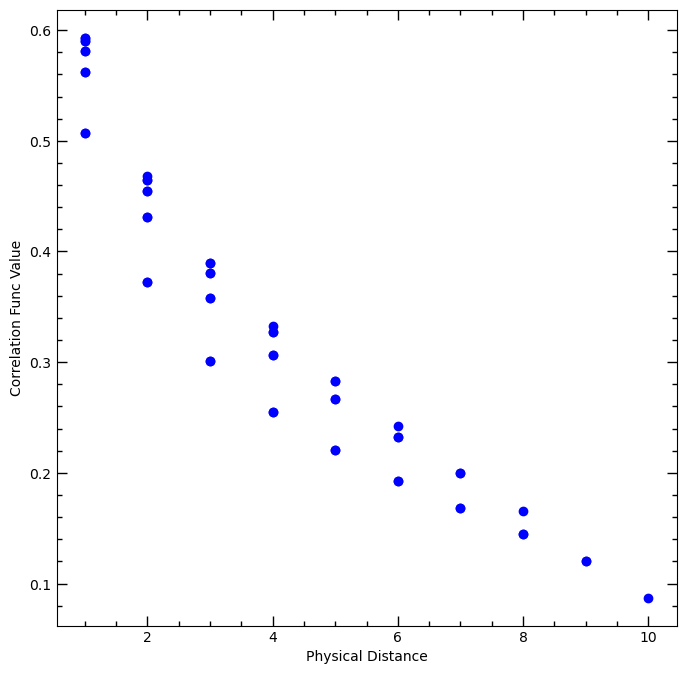

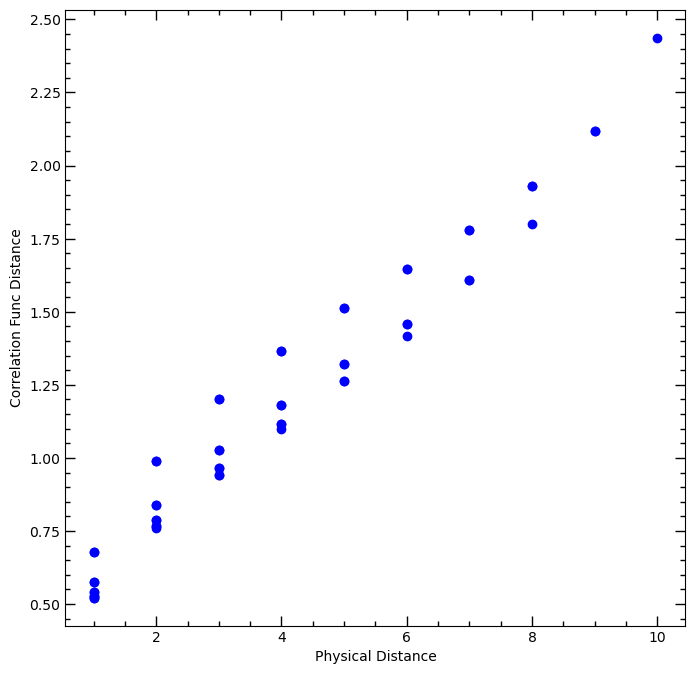

In [61]:
length = 11
H = ising_model_hamiltonian(length,1,1,0)
E, psi = H.groundstate()
graph_pdistance_vs_cfunc(length, psi)